<a href="https://colab.research.google.com/github/fsiddiqi03/Finacial-Distress-Predictor/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from google.colab import files
uploaded = files.upload()



Saving cs-training.csv to cs-training.csv


In [ ]:
# load train data
train_df = pd.read_csv('cs-training.csv')



# Display the first few rows of the training data
print("Training Data:")
print(train_df.head())



# Check for missing values in the training data
print("\nMissing Values in Training Data:")
print(train_df.isnull().sum())




Training Data:
   Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1                 1                              0.766127   45   
1           2                 0                              0.957151   40   
2           3                 0                              0.658180   38   
3           4                 0                              0.233810   30   
4           5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13    

In [ ]:
# If needed, install imbalanced-learn
!pip install -U imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

# Load data
data_df = pd.read_csv('cs-training.csv')

# Drop 'Unnamed: 0' if necessary
data_df.drop(columns='Unnamed: 0', inplace=True)

# Separate features and target
X = data_df.drop(columns='SeriousDlqin2yrs')
y = data_df['SeriousDlqin2yrs']

# Split data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y_train.value_counts()[1]/X_train.shape[0])
print(y_test.value_counts()[1]/X_test.shape[0])


# train info
print('Train data shape:', X_train.shape)
print('Train data labels, label count:', np.unique(y_train, return_counts=True))
print()

# test info
print('Test data shape:', X_test.shape)
print('Test data labels, label count:', np.unique(y_test, return_counts=True))
print()



0.06725
0.0652
Train data shape: (120000, 10)
Train data labels, label count: (array([0, 1]), array([111930,   8070]))

Test data shape: (30000, 10)
Test data labels, label count: (array([0, 1]), array([28044,  1956]))



In [ ]:
# Deal with Missing Vals
from sklearn.impute import SimpleImputer

# Impute 'MonthlyIncome' with the median
income_imputer = SimpleImputer(strategy='median')
X_train['MonthlyIncome'] = income_imputer.fit_transform(X_train[['MonthlyIncome']])

# Impute 'NumberOfDependents' with the mode (most frequent value)
dependents_imputer = SimpleImputer(strategy='most_frequent')
X_train['NumberOfDependents'] = dependents_imputer.fit_transform(X_train[['NumberOfDependents']])

# Apply the same imputation to the test set
X_test['MonthlyIncome'] = income_imputer.transform(X_test[['MonthlyIncome']])
X_test['NumberOfDependents'] = dependents_imputer.transform(X_test[['NumberOfDependents']])

# Check for missing values in the training data
print("\nMissing Values in Training Data:")
print(X_train.isnull().sum())

# Check for missing values in the test data
print("\nMissing Values in Training Data:")
print(X_test.isnull().sum())




Missing Values in Training Data:
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

Missing Values in Training Data:
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

# before SMOTE
print(y_train.value_counts()[1] / X_train.shape[0])

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Verify the new class distribution
print('Train data shape after SMOTE:', X_train_resampled.shape)
print('Train data labels after SMOTE, label count:', np.unique(y_train_resampled, return_counts=True))

# after SMOTE
print(y_train_resampled.value_counts()[1]/X_train_resampled.shape[0])





0.06725
Train data shape after SMOTE: (223860, 10)
Train data labels after SMOTE, label count: (array([0, 1]), array([111930, 111930]))
0.5


Cumulative Explained Variance: [0.30547614 0.46780693 0.58797384 0.6887143  0.78877704 0.87830108
 0.94906308 0.99886648 0.99964287 1.        ]


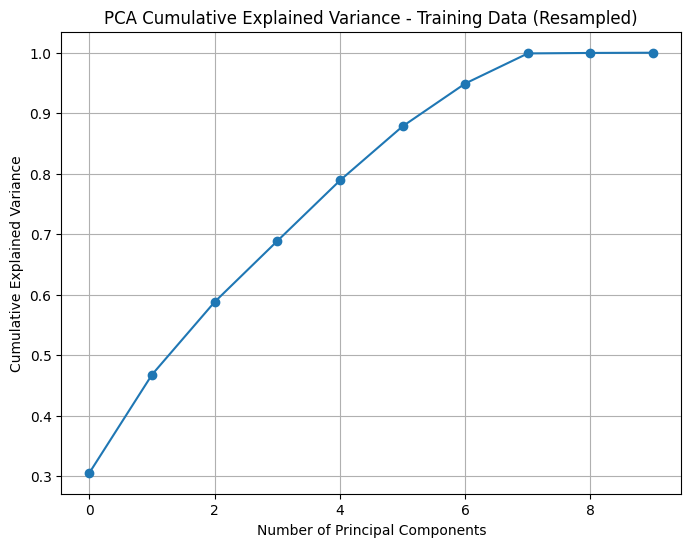

In [ ]:
# PCA Check
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardize the resampled training data
scaler = StandardScaler()
X_train_resampled_standardized = scaler.fit_transform(X_train_resampled)
X_test_resampled_standardized = scaler.transform(X_test)

# Apply PCA
pca = PCA()
pca.fit(X_train_resampled_standardized)

# Get the cumulative explained variance
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Print the cumulative explained variance
print("Cumulative Explained Variance:", cumulative_explained_variance)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance - Training Data (Resampled)')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score

# Ensure data is standardized
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)  # Transform test data

# Create a Logistic Regression model
model = LogisticRegression(class_weight='balanced', random_state=42)  # 'balanced' to address any remaining imbalance

# Train the model on the balanced training data
model.fit(X_train_scaled, y_train_resampled)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
auc = roc_auc_score(y_test, y_pred)
p_lr = precision_score(y_test, y_pred, average='weighted')
r_lr = recall_score(y_test, y_pred, average='weighted')
f1_lr = fbeta_score(y_test, y_pred, beta=1.0, average='weighted')


# Display metrics
print('Precision:', p_lr)
print('Recall:', r_lr)
print('F1-score:', f1_lr)
print('AUC score:', auc)



Precision: 0.9067818916275341
Recall: 0.6704
F1-score: 0.7538060324496375
AUC score: 0.6455974529070444


Precision: 0.90614167889564
Recall: 0.8258333333333333
F1-score: 0.8591495934912204
AUC score: 0.6521648058747297


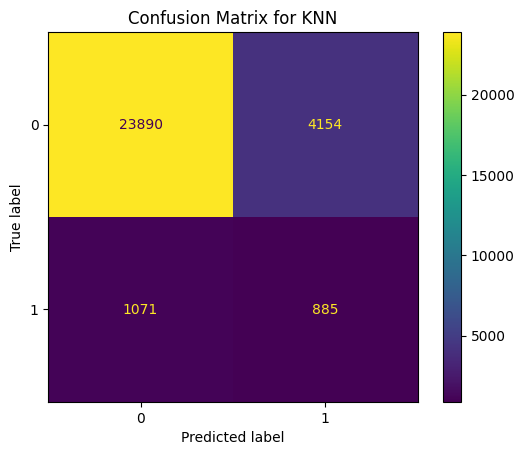

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import balanced_accuracy_score


# Algorithims
brute = 'brute'
ball = 'ball_tee'
kd = 'kd_tree'

# Metrics
man = 'manhattan'
min = 'minkowski'


# KNN classifier configuration
knn = KNeighborsClassifier(n_neighbors=15, metric=min, p=2, algorithm=brute)


# Train the KNN classifier
knn.fit(X_train_scaled, y_train_resampled)

# Predict with KNN on the test data
predictions_knn = knn.predict(X_test_scaled)

# Evaluation metrics

bacc_knn = balanced_accuracy_score(y_test, predictions_knn)
p_knn = precision_score(y_test, predictions_knn, average='weighted')
r_knn = recall_score(y_test, predictions_knn, average='weighted')
f1_knn = fbeta_score(y_test, predictions_knn, beta=1.0, average='weighted')

roc_auc = roc_auc_score(y_test, predictions_knn)

# Display metrics
print('Precision:', p_knn)
print('Recall:', r_knn)
print('F1-score:', f1_knn)
print('AUC score:', roc_auc)

# Display the confusion matrix

cm_knn = confusion_matrix(y_test, predictions_knn, labels=knn.classes_)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)

disp_knn.plot()
plt.title('Confusion Matrix for KNN')
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

clf = RandomForestClassifier(random_state=42)  # Added random_state for reproducibility
# Use a full grid over all parameters
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [3, None],
    "max_features": [1, 3, 10],
    "min_samples_split": [2, 3, 10]
}

# Run grid search
grid = RandomizedSearchCV(clf, param_grid, cv=5, scoring="roc_auc", n_iter=10, random_state=42)
grid.fit(X_train_scaled, y_train_resampled)
print("Grid-Search with roc_auc")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (auc_roc): {:.3f}".format(grid.best_score_))

# Predict probabilities for test set and calculate AUC
y_pred_proba = grid.predict_proba(X_test_scaled)[:, 1]
test_auc = roc_auc_score(y_test, y_pred_proba)
print("Test set AUC: {:.3f}".format(test_auc))



Grid-Search with roc_auc
Best parameters: {'n_estimators': 100, 'min_samples_split': 3, 'max_features': 10, 'max_depth': None}
Best cross-validation score (auc_roc): 0.970
Test set AUC: 0.805


In [ ]:
y_pred = (y_pred_proba > 0.5).astype(int)

p = precision_score(y_test, y_pred, average='weighted')
r = recall_score(y_test, y_pred, average='weighted')
f1 = fbeta_score(y_test, y_pred, beta=1.0, average='weighted')

print('Precision:', p)
print('Recall:', r)
print('F1-score:', f1)

Precision: 0.9118246898692132
Recall: 0.89
F1-score: 0.8998151508614107
